<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Viz-costs" data-toc-modified-id="Viz-costs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Viz costs</a></span></li><li><span><a href="#Run-complete-algorithm" data-toc-modified-id="Run-complete-algorithm-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run complete algorithm</a></span></li></ul></li><li><span><a href="#Save-the-results" data-toc-modified-id="Save-the-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Save the results</a></span></li></ul></div>

In [9]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size = 12)
rc('xtick', labelsize = 12)
rc('ytick', labelsize = 12)
rc('figure', figsize = (8, 4))

In [10]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from amod_ed.contractivity_v3 import viz_costs, _construct_problem
from amod_ed.contractivity_v3 import sample_solutions, run_algorithm
import cvxpy as cp
import networkx as nx
import os
import pandas as pd

from amod_ed.contractivity_v3 import plot_results_run, compute_error_KKT, get_d_values

from amod_ed.contractivity_v3 import get_new_r, get_edge_flow, get_flow_edge_od

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load

In [11]:
from amod_ed.contractivity_v3 import read_excels_icu

In [12]:
path='/Users/lucasfuentes/icu/notebooks/Data_comparison/3Nodes'

In [13]:
edges, inv_edges = read_excels_icu(path)

In [14]:
edges

,origin,destination,phi,k
0,0,1,36.0,10
1,1,0,36.0,10
2,0,2,36.0,10
3,2,0,36.0,10


In [15]:
inv_edges

,origin,destination,phi,k,shift
0,0,1,36.0,3,85
1,1,2,36.0,3,130
2,1,0,36.0,3,80
3,2,1,36.0,3,120


## Viz costs

Visualize the costs for each OD pair specified in the Excels. 

In [16]:
# inv_edges['shift'] = inv_edges['shift']+15

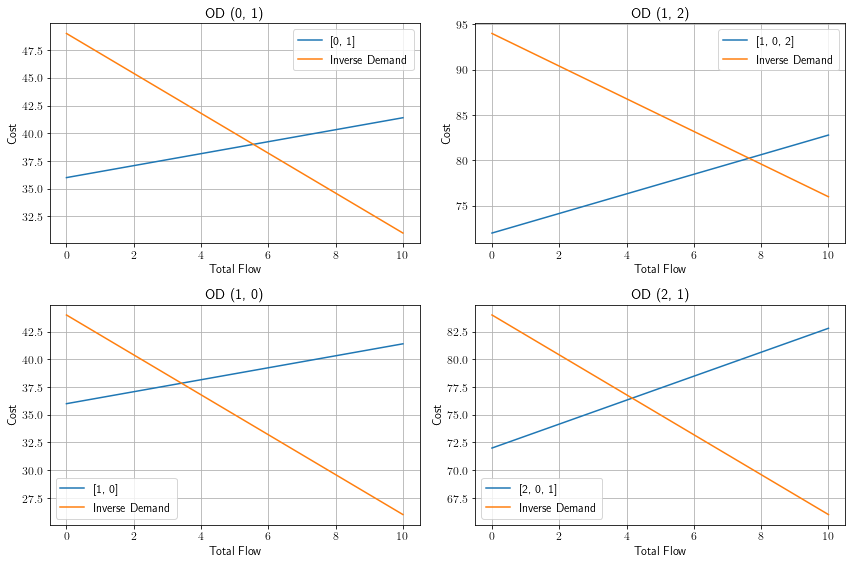

In [17]:
viz_costs(edges, inv_edges, name = 'costs1', save = False, correct = False, beta = 1)

## Run complete algorithm

In [18]:
r_tot, nodes, f_p_tot = run_algorithm(edges, inv_edges, nsolutions = 5, seed =0, max_iter = 100, beta=1)

Academic license - for non-commercial use only


/Users/lucasfuentes/miniconda3/envs/py37/lib/python3.7/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/lucasfuentes/miniconda3/envs/py37/lib/python3.7/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/lucasfuen

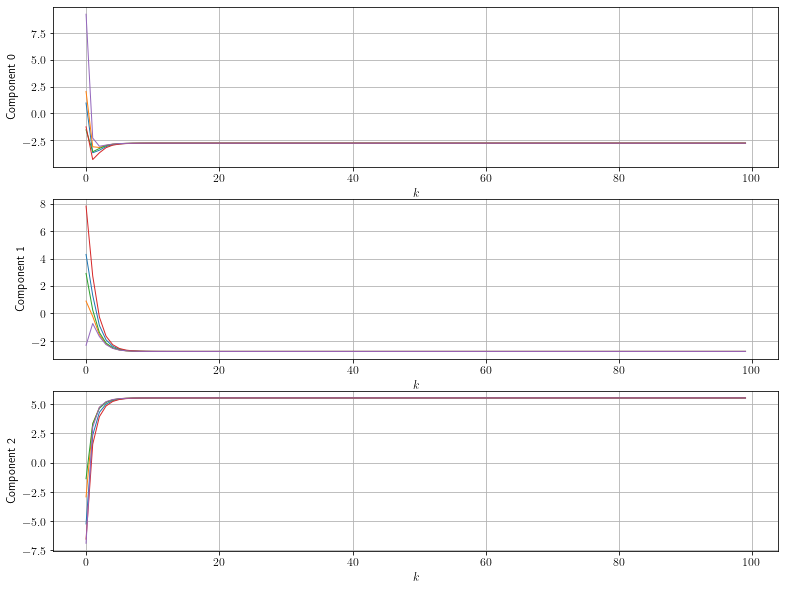

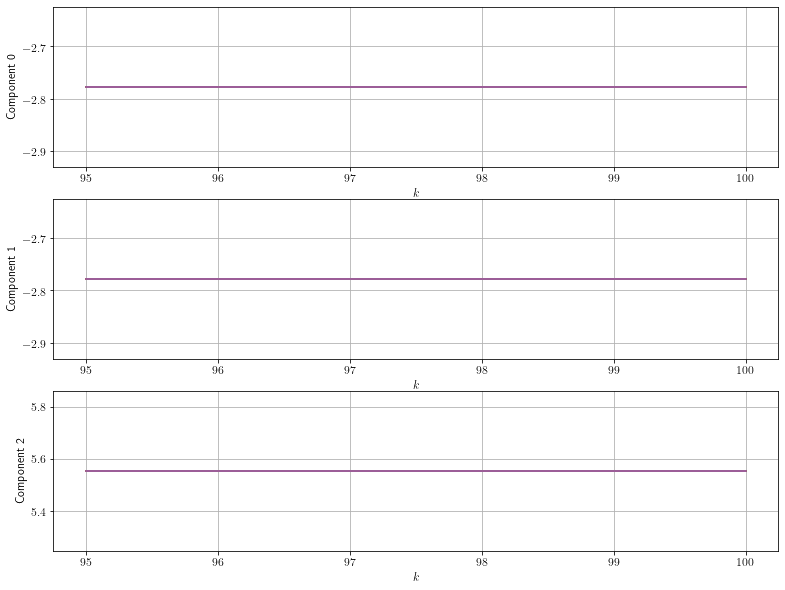

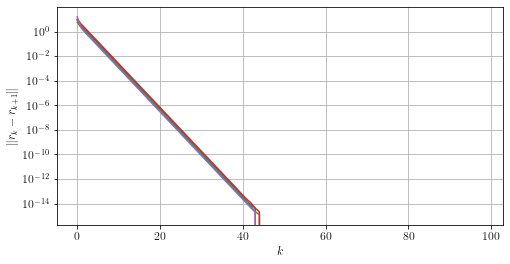

In [19]:
plot_results_run(r_tot)

# Save the results

In [20]:
path

'/Users/lucasfuentes/icu/notebooks/Data_comparison/3Nodes'

In [21]:
import pickle

In [22]:
with open(os.path.join(path,'sols_bb.pkl'), 'wb') as f:
    pickle.dump([r_tot, nodes, f_p_tot], f)